<a href="https://colab.research.google.com/github/avii-001/Machine_Learning/blob/main/Decision_Tree_using_entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# description
# vhigh- buying price
# vhigh.1-maintainance cost
# 2- no.of doors
# 2.1- number of seats
# small- spaceof luggage booth
# low- safety
# unacc-decision

In [21]:
df=pd.read_csv('/content/drive/MyDrive/kusumm/Data Science/data/car_evaluation.csv')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [22]:
# root node-main decision
# branches- diff outcomes
# leaf nodes- final outcome

# Categorical data
# Continous data -> categorize/normalize
# CART- Classification and Regression Tree
# Random Forest & Boosted decision tree(XGBoost)

# Purning: process of removing sub-nodes

# Information Gain- when dqataset is categorical (entropy)- a measure of the randomness or uncertainty in data
# Gini index -when dqataset is Continous- (Associated with prob)

In [23]:
# Overfitting
# causes: Outliners, (need to remove in decision tree)
#          Iregular data
# how to avoid?
# * Pre-Purning (Set Threadhold value)
# * Post-Purning (Cross-Validation Techinque)

In [24]:
# ordinal encoding- ASCII

In [25]:
colnames=['buying','maint','doors','persons','lugboot','safety','class']
df.columns=colnames
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lugboot', 'safety', 'class'], dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   buying   1727 non-null   object
 1   maint    1727 non-null   object
 2   doors    1727 non-null   object
 3   persons  1727 non-null   object
 4   lugboot  1727 non-null   object
 5   safety   1727 non-null   object
 6   class    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [27]:
df['class'].value_counts()

,count
class,
unacc,1209
acc,384
good,69
vgood,65


In [28]:
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lugboot,0
safety,0
class,0


In [29]:
X=df.drop(['class'],axis=1)
y=df['class']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

In [31]:
#Feature Engineering - process of transforming raw data into meaningful features. help predicts better
X_train.dtypes


,0
buying,object
maint,object
doors,object
persons,object
lugboot,object
safety,object


In [32]:
!pip install category_encoders

In [33]:
# encoding
import category_encoders as ce
encode=ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lugboot','safety'])
X_train=encode.fit_transform(X_train)
X_test=encode.transform(X_test)

In [34]:
X_train.head()

,buying,maint,doors,persons,lugboot,safety
1684,1,1,1,1,1,1
1369,1,2,1,2,1,1
571,2,3,2,3,2,1
1123,3,4,2,1,3,1
1007,3,3,2,1,1,2


In [35]:
from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=66)
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=66)

In [36]:
y_pred=clf.predict(X_test)

In [37]:
# Accuracy Score
#In Surpervised sud be>70

In [38]:
from sklearn.metrics import accuracy_score

print(f'Model accuracy score with criterion gini index: {(accuracy_score(y_test,y_pred)):.4f}')

Model accuracy score with criterion gini index: 0.7919


In [39]:
# Now, comparing the training set and the test set
y_pred_train=clf.predict(X_train)

In [40]:
print(f'Training-set accuracy score: {(accuracy_score(y_train,y_pred_train)):.4f}')

Training-set accuracy score: 0.7741


In [41]:
print(f'Training-set score of our model: {(clf_gini.score(X_train,y_train)):.4f}')
print(f'Testing-set score of our model: {(clf_gini.score(X_test,y_test)):.4f}')

Training-set score of our model: 0.7741
Testing-set score of our model: 0.7919


[Text(0.625, 0.875, 'x[3] <= 2.5\nentropy = 1.208\nsamples = 1381\nvalue = [297.0, 53.0, 972.0, 59.0]'),
 Text(0.5, 0.625, 'x[5] <= 1.5\nentropy = 1.493\nsamples = 914\nvalue = [297, 53, 505, 59]'),
 Text(0.5625, 0.75, 'True  '),
 Text(0.25, 0.375, 'x[0] <= 3.5\nentropy = 1.717\nsamples = 313\nvalue = [162.0, 26.0, 66.0, 59.0]'),
 Text(0.125, 0.125, 'entropy = 1.707\nsamples = 241\nvalue = [126.0, 26.0, 30.0, 59.0]'),
 Text(0.375, 0.125, 'entropy = 1.0\nsamples = 72\nvalue = [36, 0, 36, 0]'),
 Text(0.75, 0.375, 'x[5] <= 2.5\nentropy = 1.016\nsamples = 601\nvalue = [135, 27, 439, 0]'),
 Text(0.625, 0.125, 'entropy = 0.0\nsamples = 305\nvalue = [0, 0, 305, 0]'),
 Text(0.875, 0.125, 'entropy = 1.349\nsamples = 296\nvalue = [135, 27, 134, 0]'),
 Text(0.75, 0.625, 'entropy = 0.0\nsamples = 467\nvalue = [0, 0, 467, 0]'),
 Text(0.6875, 0.75, '  False')]

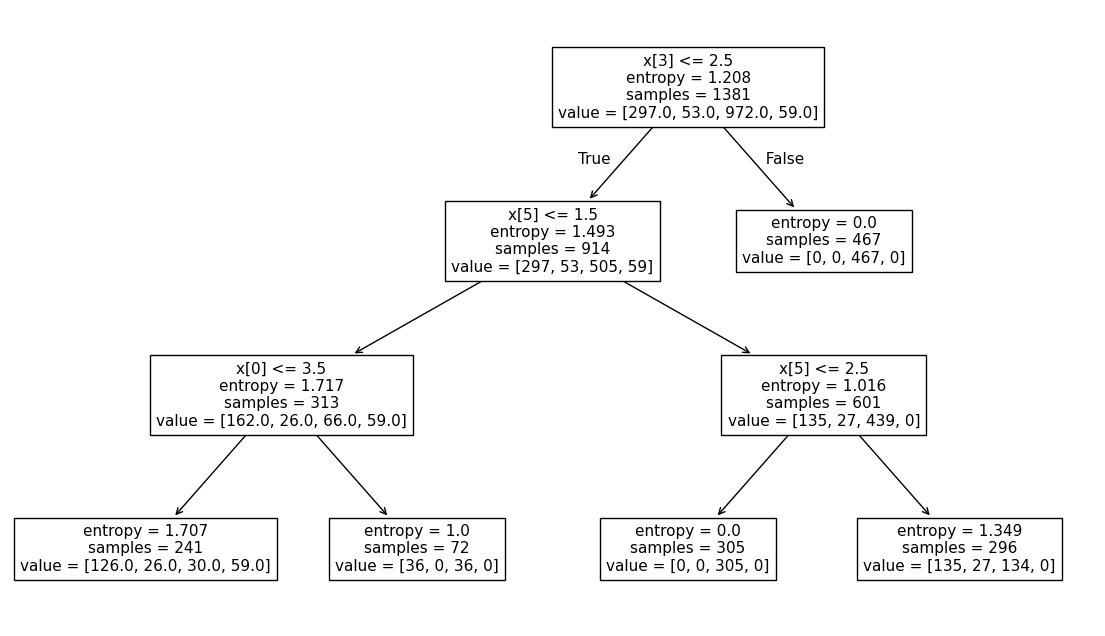

In [42]:

plt.figure(figsize=(14,8))
from sklearn import tree
tree.plot_tree(clf.fit(X_train, y_train))

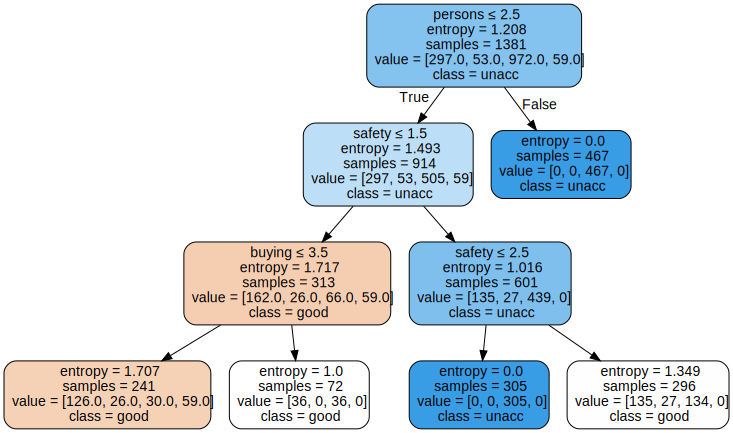

In [43]:
import graphviz
data=tree.export_graphviz(clf, out_file=None,
                                         feature_names=X_train.columns, class_names=y_train,
                                         filled=True, rounded=True, special_characters=True)
dt=graphviz.Source(data)
dt

In [44]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix\n{cm}')

Confusion Matrix
[[ 87   0   0   0]
 [ 16   0   0   0]
 [ 50   0 187   0]
 [  6   0   0   0]]


In [45]:
# accuracy, precision ,recall, f1 and support

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         acc       0.55      1.00      0.71        87
        good       0.00      0.00      0.00        16
       unacc       1.00      0.79      0.88       237
       vgood       0.00      0.00      0.00         6

    accuracy                           0.79       346
   macro avg       0.39      0.45      0.40       346
weighted avg       0.82      0.79      0.78       346

